# Name: Hadiqa Malik

# The Sparks Foundation


# Exploratory Data Analysis-Terrorism (Level-Intermediate)

# Task no. 04
-Find out the hot zones of terrorism

-All security issues and insights drive by EDA

# 01  Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mbd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# 02 Reading the DataSet

In [2]:
#Loading Data from the Computer
df = pd.read_csv("global_terrorism.csv",encoding='latin1',index_col='eventid')
df.head() 

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# 03  Data Reading and Cleaning

In [3]:
#Basic Information of the Datset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 197000000001 to 201712310032
Columns: 134 entries, iyear to related
dtypes: float64(55), int64(21), object(58)
memory usage: 187.1+ MB


In [4]:
#Number of Rows and Columns of the Dataset
df.shape

(181691, 134)

In [5]:
# Column Names of Dataset
df.columns.values

array(['iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution',
       'country', 'country_txt', 'region', 'region_txt', 'provstate',
       'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'alternative', 'alternative_txt', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt',
       'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname',
       'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain1', 'guncertain2', 'guncertain3', 'individual',
       

In [6]:
df.describe()

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# 04 Cleaning the Data 

In [7]:
#Findout the empty cells in the dataset 
df.isnull().sum()

iyear              0
imonth             0
iday               0
approxdate    172452
extended           0
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 134, dtype: int64

In [8]:
df["nwound"] = df["nwound"].fillna(0)
df['nkill'] = df['nkill'].fillna(0)

In [9]:
df['Casualities'] = df['nkill'] + df['nwound']

In [10]:
df['city'] = df['city'].replace(['Unknown'],'Baghdad')
df

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,...,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN,3.0
201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,...,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN,9.0
201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,0.0


In [11]:
#Rename Columns in the Dataset
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [12]:
#Extracting the relevant Columns from the Dataset for Visualization
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude','Attacktype','kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [13]:
df.head(5)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
eventid,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Baghdad,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [14]:
#New Number of Rows and Columns after Data Extraction
df.shape

(181691, 18)

In [15]:
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [16]:
#Sum of killing people
df['kill'].sum()

411868.0

In [17]:
#Sum of injured people
df['Wound'].sum()

523869.0

# 05 Exploratory Data Analysis

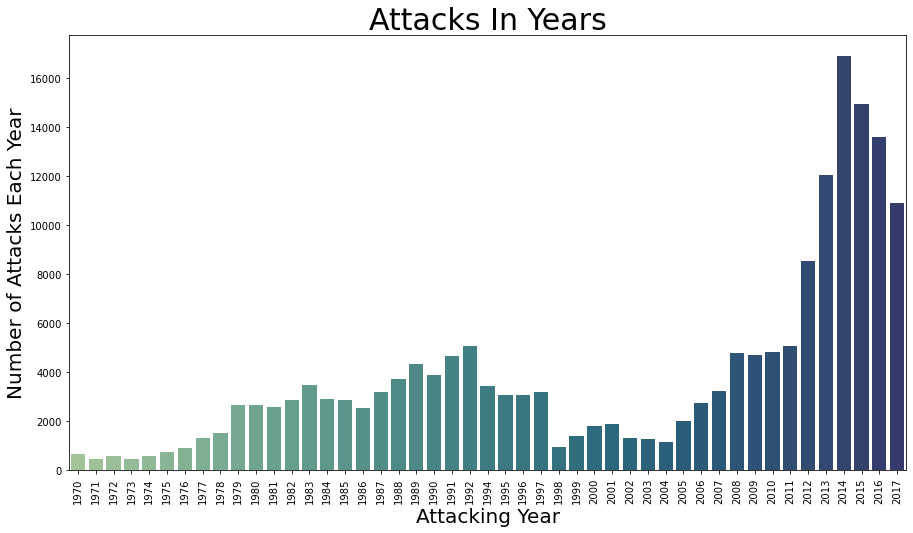

In [18]:
#Terror Attacks In Years
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize = (15,8))
sns.barplot(x = year,
           y = years_count,
           palette = "crest")

plt.xticks(rotation = 90)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

# Number of Attacks
High number of Attacks occured in 2014

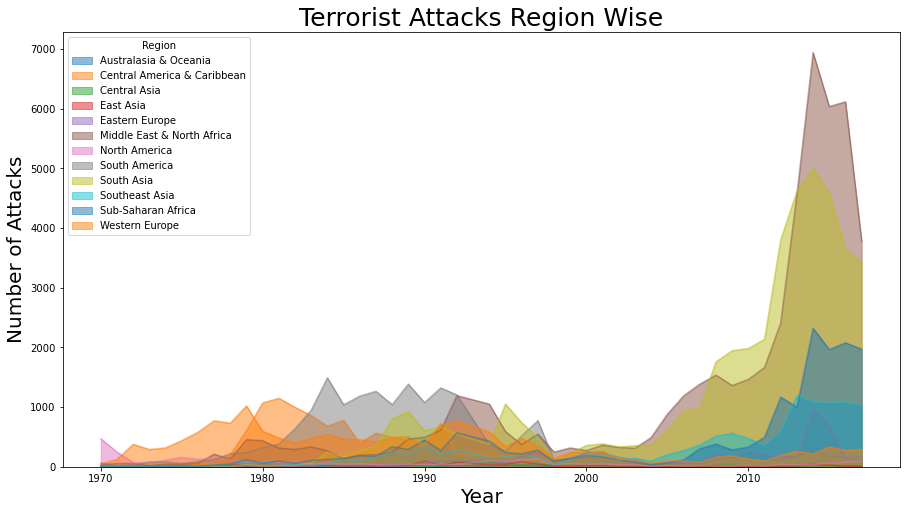

In [19]:
#Number of Attacks Region and Year Wise

terror_region=pd.crosstab(df.Year,df.Region).plot(kind='area',stacked=False,figsize=(15,8))
terror_region.plot(color=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True))

plt.title('Terrorist Attacks Region Wise',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

# Region With Most Attack
Majority Attacks have occurred in Middle East and North Africa

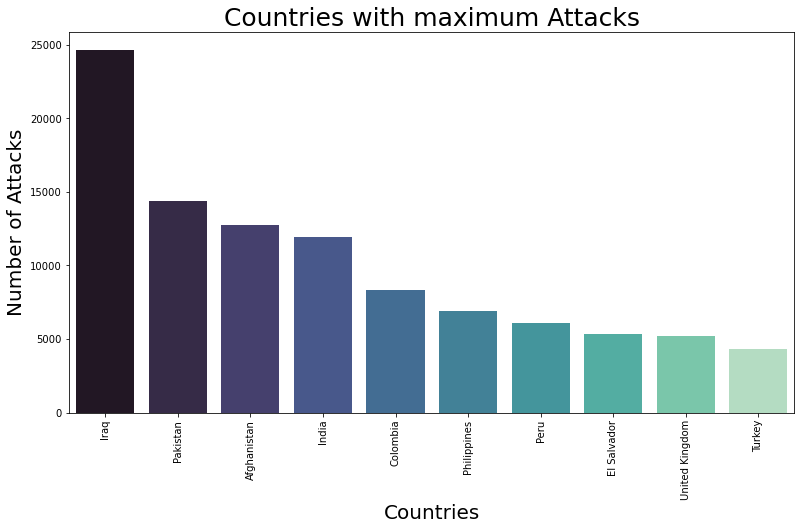

In [20]:
#Top 10 Countries with most Attacks

plt.subplots(figsize = (13,7))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette = 'mako')

plt.title('Countries with maximum Attacks',fontsize = 25)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Number of Attacks', fontsize =20)
plt.xticks(rotation = 90)
plt.show()

# Country With Most Attack
Majority Attacks have occurred in Iraq

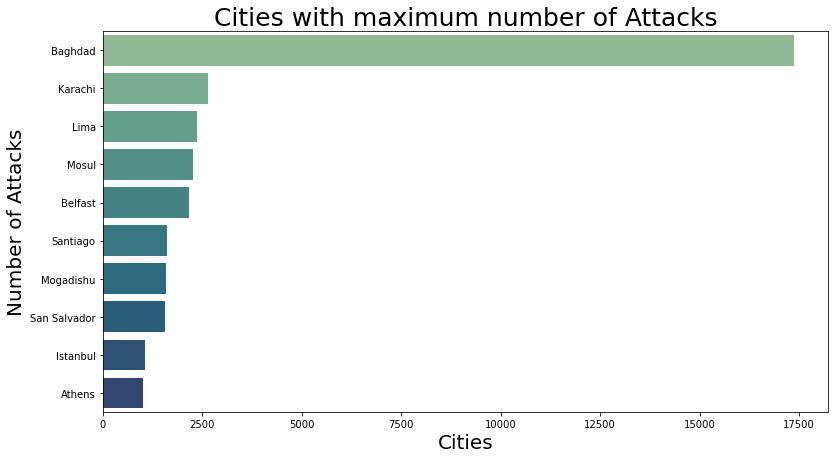

In [21]:
#Top 10 Cities with most Attacks

plt.subplots(figsize = (13,7))
sns.barplot(df['City'].value_counts()[:10].values,df['City'].value_counts()[:10].index,palette = 'crest')

plt.title('Cities with maximum number of Attacks',fontsize = 25)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Number of Attacks', fontsize =20)
plt.show()

# City With Most Attack
Majority Attacks have occurred in Baghdad,Iraq.

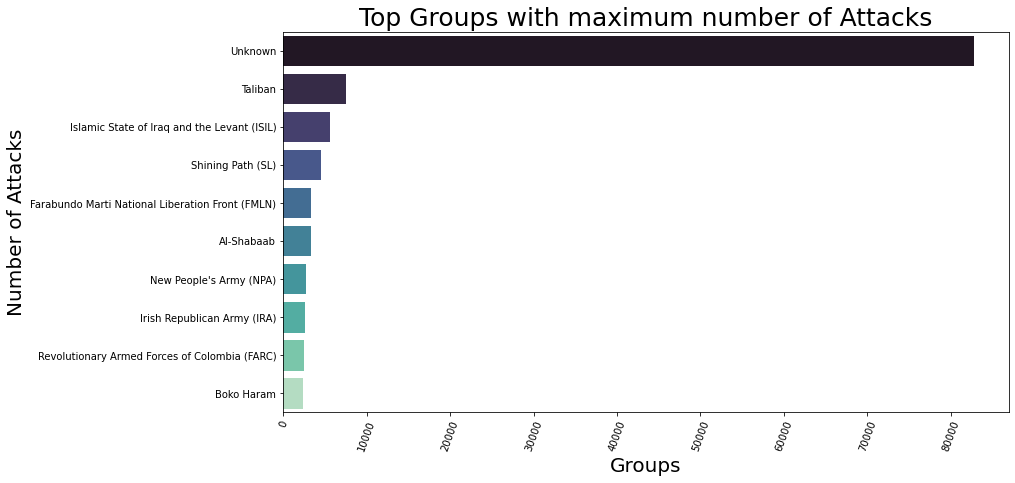

In [22]:
#Top 10 Terrorist Groups with most Attacks

plt.subplots(figsize = (13,7))
sns.barplot(df['Group'].value_counts()[:10].values,df['Group'].value_counts()[:10].index,palette = 'mako')

plt.title('Top Groups with maximum number of Attacks',fontsize = 25)
plt.xlabel('Groups',fontsize=20)
plt.ylabel('Number of Attacks', fontsize =20)
plt.xticks(rotation = 70)
plt.show()

# Terrorist Groups
 Majority Attacks has done by "Unknown Groups", followed by "Taliban"

In [23]:
# Top 10 Groups with most Attacks 
print("Most Attacks have done by unknown groups followed by Taliban Group")
df['Group'].value_counts()[:10]


Most Attacks have done by unknown groups followed by Taliban Group


Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

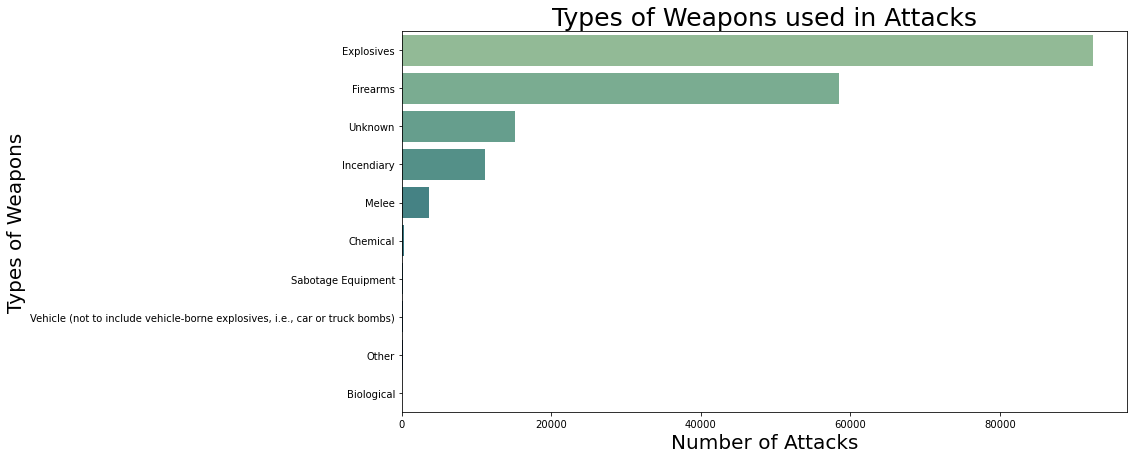

In [24]:
#Top Weapons used in Attacks

plt.subplots(figsize = (13,7))
sns.barplot(df['Weapon'].value_counts()[:10].values,df['Weapon'].value_counts()[:10].index,palette = 'crest')

plt.title('Types of Weapons used in Attacks',fontsize = 25)
plt.xlabel('Number of Attacks',fontsize=20)
plt.ylabel('Types of Weapons', fontsize =20)
plt.show()

# Types of Weapons used in Attacks
Mostly Terrorists used Explosives in killing Terrorists

In [25]:
# Top 10 Weapons used in Attacks
print("Explosives have been used in majority attacks")
df['Weapon'].value_counts()

Explosives have been used in majority attacks


Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

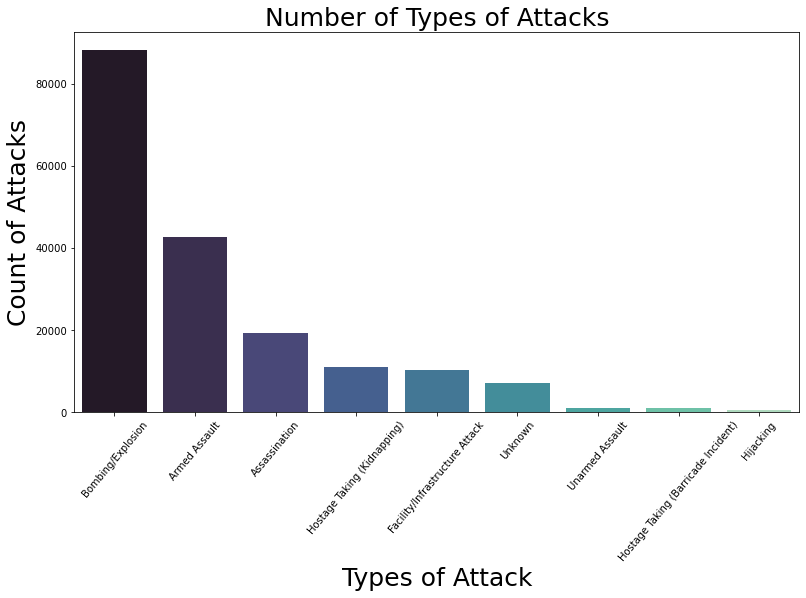

In [26]:
#Top 10 Type of Attacks occured

plt.subplots(figsize = (13,7))
sns.barplot(df['Attacktype'].value_counts()[:10].index,df['Attacktype'].value_counts()[:10].values,palette = 'mako')

plt.title('Number of Types of Attacks',fontsize = 25)
plt.xlabel('Types of Attack',fontsize=25)
plt.ylabel('Count of Attacks', fontsize =25)
plt.xticks(rotation = 50)
plt.show()

# Major type of Terrorist Attack
Bombing/Explosion is the type of Attack which occurred the most.

In [27]:
# Top 10 Attack Types 
print("Top Attack type is Bombing/Explosion")
df['Attacktype'].value_counts()

Top Attack type is Bombing/Explosion


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

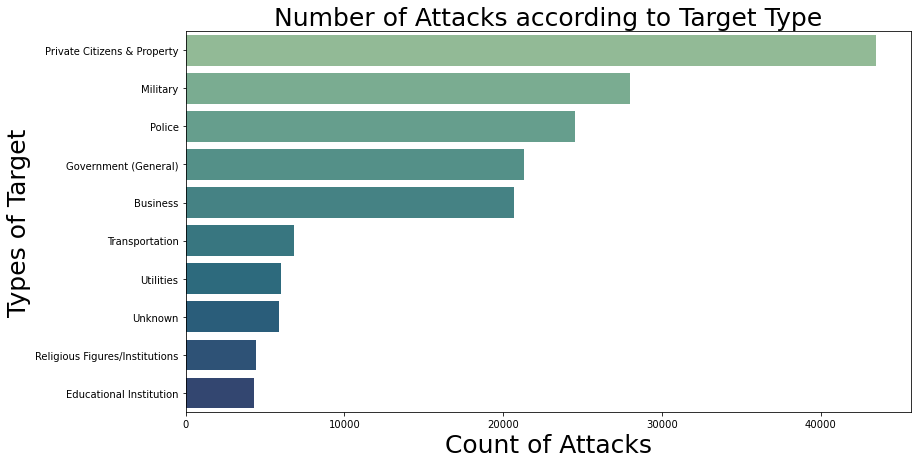

In [28]:
#Top Targets by Terrorists in Attacks

plt.subplots(figsize = (13,7))
sns.barplot(df['Targettype'].value_counts()[:10].values,df['Targettype'].value_counts()[:10].index,palette = 'crest')

plt.title('Number of Attacks according to Target Type',fontsize = 25)
plt.ylabel('Types of Target',fontsize=25)
plt.xlabel('Count of Attacks', fontsize =25)
plt.show()

# Types of Target
Private Citizens & Property is the top type of target by terrorists.

In [29]:
# Top 10 Attack Types 
print("Top Target Type in Terrorism Attacks is Private Citizens & Property")
df['Targettype'].value_counts()[:10]

Top Target Type in Terrorism Attacks is Private Citizens & Property


Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Targettype, dtype: int64

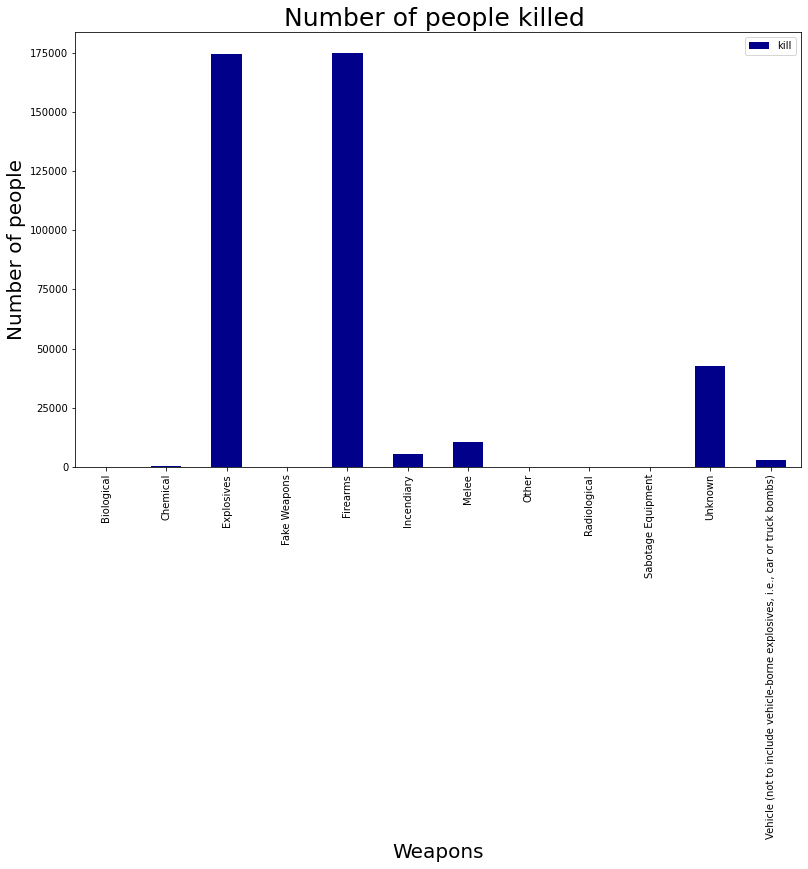

In [30]:
# Weapons causes majority killing

df[['Weapon','kill']].groupby(["Weapon"],axis=0).sum().plot(kind='bar',figsize=(13,8),color=['darkblue'])
plt.xticks(rotation=90)

plt.title("Number of people killed ",fontsize=25)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Weapons',fontsize=20)
plt.show()

# Major Weapons causes Killing

Explosives and Firearms have used in killing most people

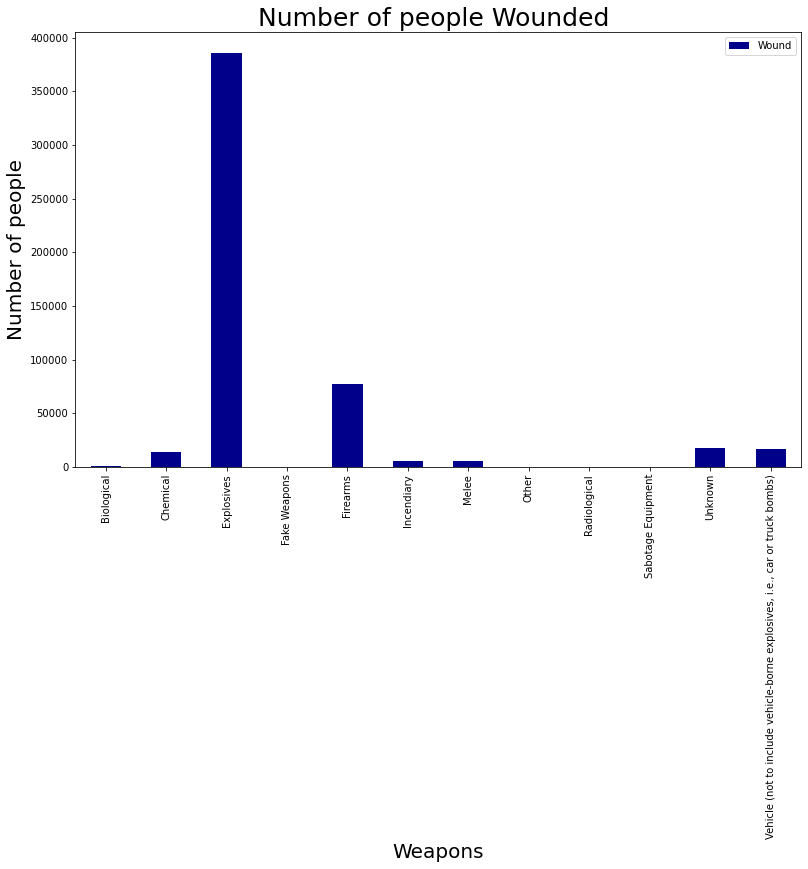

In [31]:
# Weapons causes majority injuries

df[['Weapon','Wound']].groupby(["Weapon"],axis=0).sum().plot(kind='bar',figsize=(13,8),color=['darkblue'])
plt.xticks(rotation=90)

plt.title("Number of people Wounded ",fontsize=25)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Weapons',fontsize=20)
plt.show()

# Major Weapon causing Injuries

Explosives and Firearms have used in wounding most people

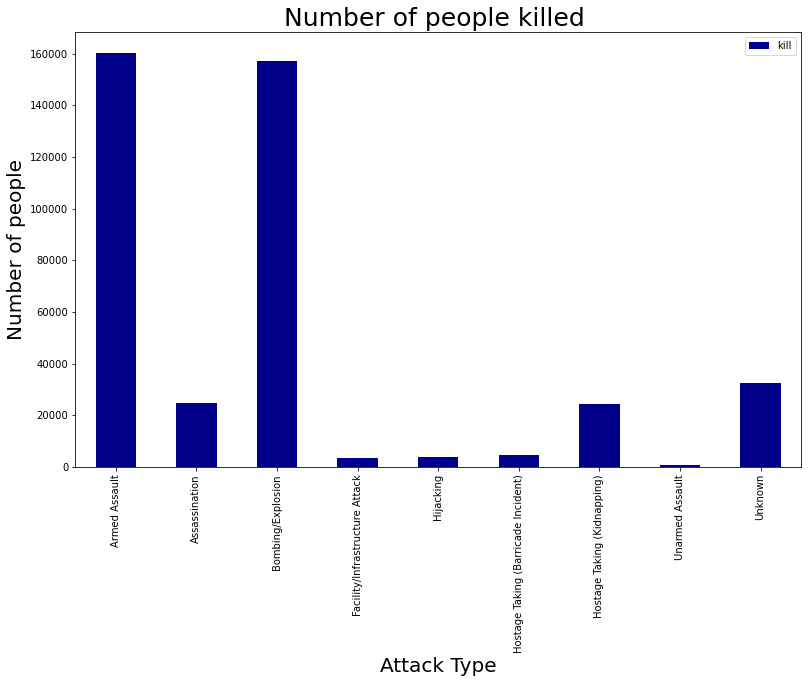

In [32]:
# Type of Attack causes majority killing

df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(13,8),color=['darkblue'])
plt.xticks(rotation=90)

plt.title("Number of people killed ",fontsize=25)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.show()

# Type of Attack causing Killing

Armed Assault and Bombing/Explosion have used in killing most people

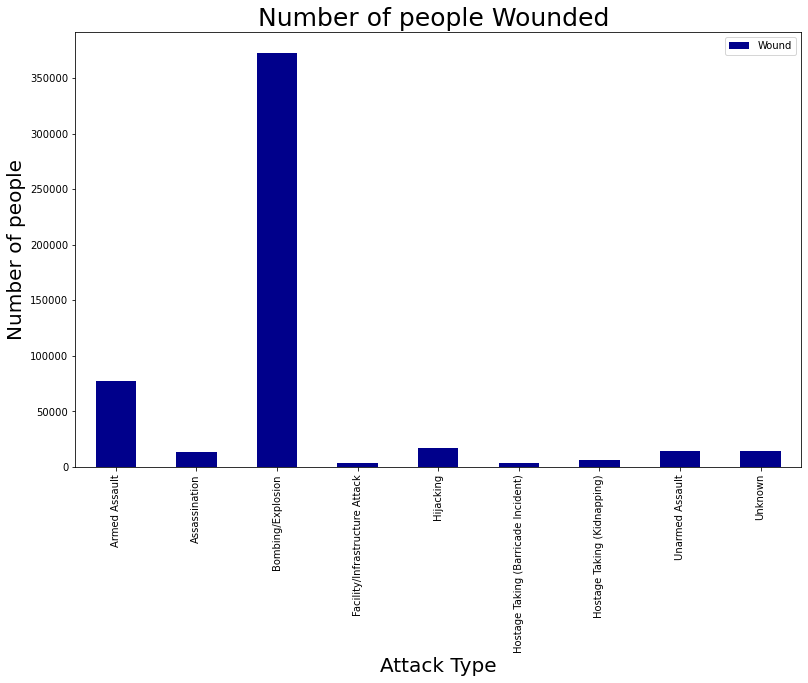

In [33]:
# Weapons causes majority Injuries

df[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(13,8),color=['darkblue'])
plt.xticks(rotation=90)

plt.title("Number of people Wounded ",fontsize=25)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.show()

# Type of Attack causing Injuries

Bombing/Explosion have used in killing most people

# Insights and Conclusion
Following Insights have been derived from the above analysis and visualization:

Highest attacks occured in:

1. Country: Iraq
2. Region: Middle East & North Africa
3. City: Baghdad
4. Year: 2014
5. Month: May


- Majority Attack type is: Bombing/explosion

- Top Target Type in majority Attacks: Privat-e Citizens & Property  

- Most Group Attack is Taliban


# Weapons

- Weapons mostly used in Attacks: Explosives 

- Majority people killed and injured in "Explosives" and "Firearms"


# Type of Attacks

- Majority people killed in "Armed Assault" and "Bombing/Explosion"

- Majority people injured in "Bombing/Explosion" 


# Total number of Killed and Injured People

- Total number of people killed: 411868	

- Total number of people wounded:523869

- Maximum number of killing people in an attack is 1570

- Maximum number of wounded people in an attack is 8191



# The End